# Comparison of random number generators

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

N_SAMPLES = 250000
BINS = 100

### 1. Linear Congruential (Standard C library)

In [2]:
linear_congruential = pd.read_csv("data/gaussian/linear_congruential.csv", nrows=N_SAMPLES)
linear_congruential.describe()

,Linear Congruential Numbers
count,250000.000000
mean,0.001128
std,0.999690
min,-4.590471
25%,-0.671744
50%,0.000922
75%,0.674181
max,4.315579


### 2. Mersenne-Twister (Python's random)

In [3]:
mersenne_twister = pd.read_csv("data/gaussian/mersenne_twister.csv", nrows=N_SAMPLES)
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,250000.000000
mean,0.003543
std,1.000773
min,-4.298877
25%,-0.671810
50%,0.005608
75%,0.677559
max,4.616292


### 3. True random numbers (random.org)

In [4]:
true_random = pd.read_csv("data/gaussian/true_random.csv", nrows=N_SAMPLES)
true_random.describe()

,True Random Numbers
count,250000.000000
mean,0.003226
std,1.000599
min,-4.645093
25%,-0.670416
50%,0.003633
75%,0.675251
max,4.727290


## Histograms

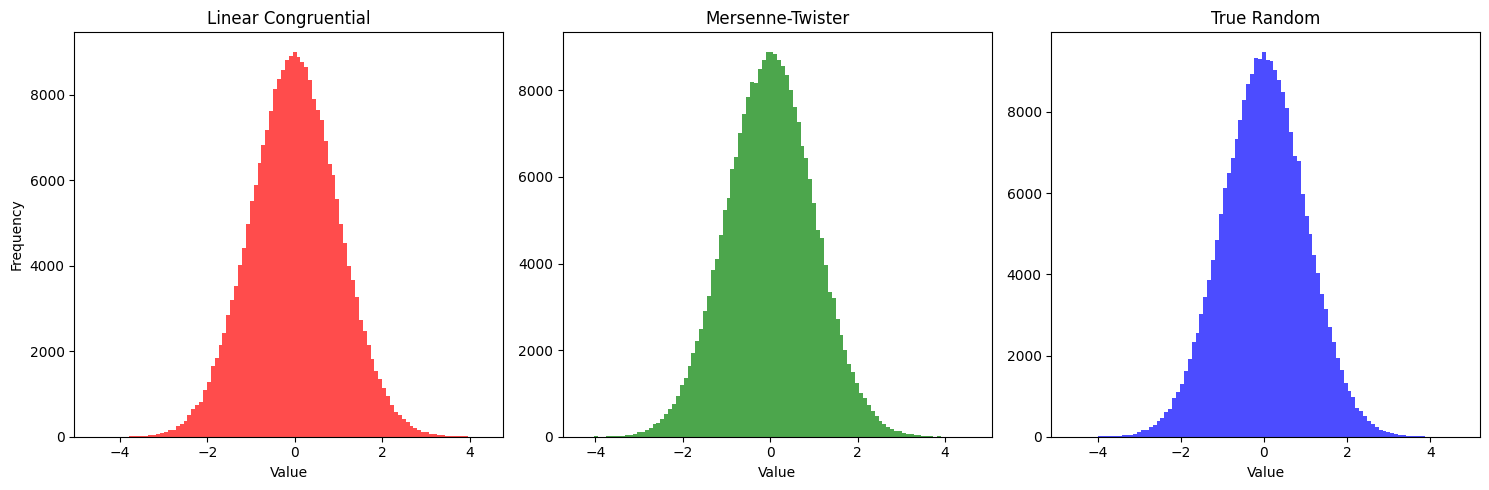

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/hist_gauss.png")

## Student's t-Test

In [6]:
ttest1 = stats.ttest_ind(linear_congruential, true_random)
print(f"Linear Congruential vs True Random: t = {ttest1.statistic[0]:.3f}, p = {ttest1.pvalue[0]:.3f}")

ttest2 = stats.ttest_ind(mersenne_twister, true_random)
print(f"Mersenne-Twister vs True Random: t = {ttest2.statistic[0]:.3f}, p = {ttest2.pvalue[0]:.3f}")

ttest3 = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest3.statistic[0]:.3f}, p = {ttest3.pvalue[0]:.3f}")

Linear Congruential vs True Random: t = -0.741, p = 0.458
Mersenne-Twister vs True Random: t = 0.112, p = 0.911
Linear Congruential vs Mersenne-Twister: t = -0.853, p = 0.393
